In [23]:
import matplotlib.pyplot as plt
import re 
import ast


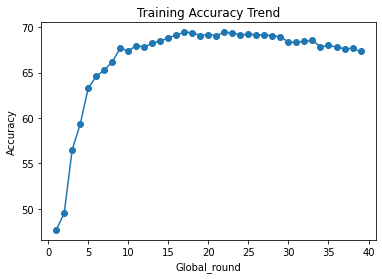

In [2]:
###plot the training accuracy

file_path = "/home/shiyue/FLsim/results/accuracy_trend.txt"

accuracy_values = []

with open(file_path,"r") as file:
    lines = file.readlines()

for line in lines:
    data = ast.literal_eval(line)
    accuracy = data['Accuracy']
    accuracy_values.append(accuracy)

epochs = range(1,len(accuracy_values)+1)
plt.plot(epochs,accuracy_values,marker='o',linestyle='-')

plt.xlabel("Global_round")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Trend")

plt.show()

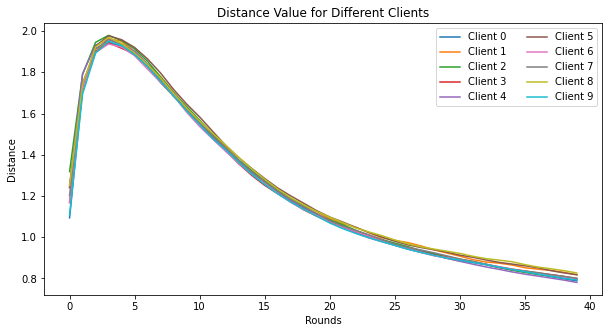

In [3]:
################################################################################
#######################plot the distance for each clients
################################################################################
# Define the file path
file_path = "/home/shiyue/FLsim/results/distance_values.txt"

# Initialize a dictionary to store client data
client_data = {}

# Read the data from the file
with open(file_path, "r") as file:
    for line in file:
        parts = line.split()
        client_number = int(parts[1][:-2])  # Extract the client number
        norm_value = float(parts[3])  # Extract the norm value
        if client_number not in client_data:
            client_data[client_number] = []
        client_data[client_number].append(norm_value)
# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(10, 5))
# Plot the data for all clients
for client_number, data in client_data.items():
    rounds = range(len(data))  # X-axis values
    plt.plot(rounds, data, label=f'Client {client_number}')

# Set plot labels and legend
plt.title("Distance Value for Different Clients")
plt.xlabel("Rounds")
plt.ylabel("Distance")
plt.legend(loc="upper right")

# Define the number of legend columns
num_legend_columns = 2  # Adjust as needed

# Create a legend with multiple columns
plt.legend(loc="upper right", ncol=num_legend_columns)

# Show the plot
plt.show()

In [ ]:
### plot the client data distribution
file_path = "/home/shiyue/FLsim/results/client_data_size.txt"

clients = []
data_sizes = []

with open (file_path, 'r') as file:
    lines = file.readlines()[:10]


for line in lines:
    parts = line.split(", ")
    client = int(parts[0].split(": ")[1])
    data_size = int(parts[1].split(": ")[1])
    clients.append(client)
    data_sizes.append(data_size)


plt.bar(clients,data_sizes)
plt.xlabel("Client")
plt.ylabel("Value (Data Size)")
plt.title("Clients data petition")

for i,value in enumerate(data_sizes):
    plt.text(clients[i],value,str(value),ha='center',va='bottom')

plt.show()





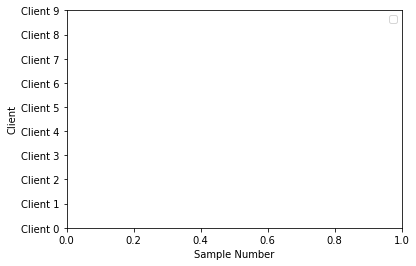

In [2]:
import matplotlib.pyplot as plt

data = {
    'Client 0': {
        'Train Label 0': 17,
        'Train Label 1': 2197,
        'Train Label 2': 11,
        'Train Label 3': 38,
        'Train Label 4': 44,
        'Train Label 5': 65,
        'Train Label 6': 387,
        'Train Label 7': 527,
        'Train Label 8': 409,
        'Train Label 9': 1305
    },
    'Client 1': {
        'Train Label 0': 0,
        'Train Label 1': 254,
        'Train Label 2': 2968,
        'Train Label 3': 527,
        'Train Label 4': 81,
        'Train Label 5': 4,
        'Train Label 6': 443,
        'Train Label 7': 0,
        'Train Label 8': 53,
        'Train Label 9': 670
    }
}

fig, ax = plt.subplots()
for i, client in enumerate(data):
    for j, label in enumerate(data[client]):
        ax.barh(i, data[client][label], left=sum([data[client][l] for l in list(data[client])[:j] if 'Train' in l]), height=0.5, label=label)
ax.set_yticks(range(len(data)))
ax.set_yticklabels(data.keys())
ax.set_xlabel('Sample Number')
ax.set_ylabel('Client')
ax.legend()
plt.show()
